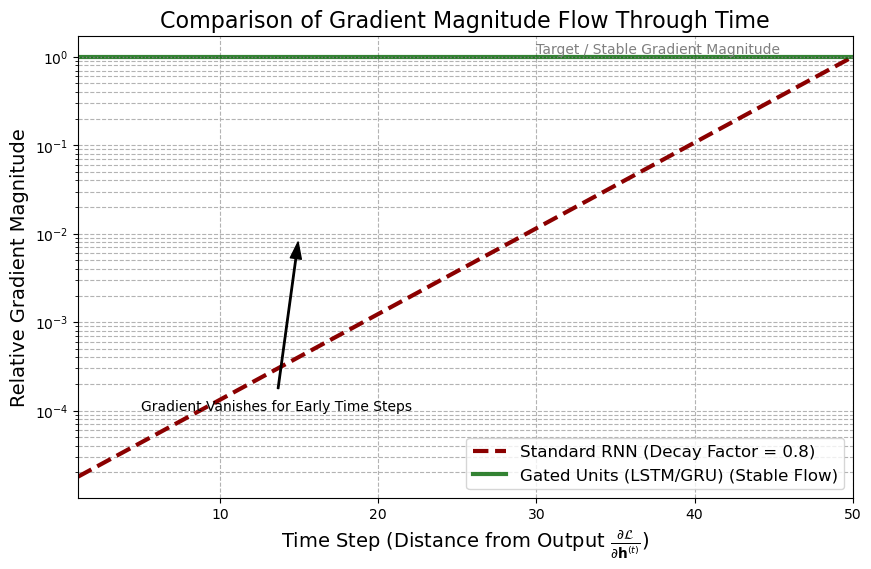

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
T = 50  # Number of time steps
time_steps = np.arange(1, T + 1)

# --- 1. Standard RNN (Vanishing Gradient) ---
# Simulating the product of recurrent weight (W) and activation derivative (f')
# Let the combined factor (gamma) be < 1.0 (e.g., 0.8)
gamma_rnn_vanish = 0.8
# Gradient magnitude relative to the last time step (t=T)
# Gradient at time t is proportional to gamma^(T - t)
rnn_vanish_gradient = np.power(gamma_rnn_vanish, T - time_steps)

# --- 2. Gated Unit (LSTM/GRU) (Stable Gradient) ---
# Simulating the gradient flow through the constant error carousel (CEC) or update gate.
# The gate values (f_t or z_t) are close to 1, maintaining the gradient near 1.0
lstm_stable_gradient = np.ones(T)

# --- 3. Plotting ---
plt.figure(figsize=(10, 6))

plt.plot(time_steps, rnn_vanish_gradient, label=f'Standard RNN (Decay Factor = {gamma_rnn_vanish})', color='darkred', linewidth=3, linestyle='--')
plt.plot(time_steps, lstm_stable_gradient, label='Gated Units (LSTM/GRU) (Stable Flow)', color='darkgreen', linewidth=3, alpha=0.8)

plt.title('Comparison of Gradient Magnitude Flow Through Time', fontsize=16)
plt.xlabel('Time Step (Distance from Output $\\frac{\\partial \\mathcal{L}}{\\partial \\mathbf{h}^{(t)}}$)', fontsize=14)
plt.ylabel('Relative Gradient Magnitude', fontsize=14)
plt.yscale('log') # Use a log scale for y-axis to better show the exponential decay
plt.grid(True, which="both", ls="--", c='0.7')
plt.legend(fontsize=12)
plt.xlim(1, T)
plt.axhline(1.0, color='gray', linestyle=':', linewidth=1)
plt.annotate('Target / Stable Gradient Magnitude', xy=(30, 1.1), color='gray')

plt.annotate('Gradient Vanishes for Early Time Steps', xy=(15, 0.01), xytext=(5, 0.0001),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=10, ha='left')

plt.savefig('gradient_flow_comparison.png')